## Fichier dédié à l'établissement du modèle de régression linéaire

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr
import qsar_utils as qu

### Chargement des données

In [3]:
df_norm_train = pd.read_csv("data/qsar_fish_toxicity_norm_train.csv")
df_LC50_train = df_norm_train["LC50"]
df_norm_train = df_norm_train.drop(columns = "LC50")
df_norm_test = pd.read_csv("data/qsar_fish_toxicity_norm_test.csv")
df_LC50_test = df_norm_test["LC50"]
df_norm_test = df_norm_test.drop(columns = "LC50")

## Visualisation du résultat

- Prédiction des données

In [8]:
model = LinearRegression()
model.fit(df_norm_train, df_LC50_train)
predicted_LC50_test = model.predict(df_norm_test)

- Filtration des données selon l'AD

In [9]:
y_pred_strict, y_test_strict, _ = qu.apply_AD(X_train = df_norm_train,
                                            X_test = df_norm_test,
                                            y_test = df_LC50_test,
                                            y_pred_test = predicted_LC50_test,
                                            knn = NearestNeighbors(n_neighbors=6, metric='euclidean'), threshold=0.13)

y_pred_soft, y_test_soft, _ = qu.apply_AD(X_train = df_norm_train,
                                        X_test = df_norm_test,
                                        y_test = df_LC50_test,
                                        y_pred_test = predicted_LC50_test,
                                        knn = NearestNeighbors(n_neighbors=6, metric='euclidean'), threshold=0.20)

- Résultat sans AD

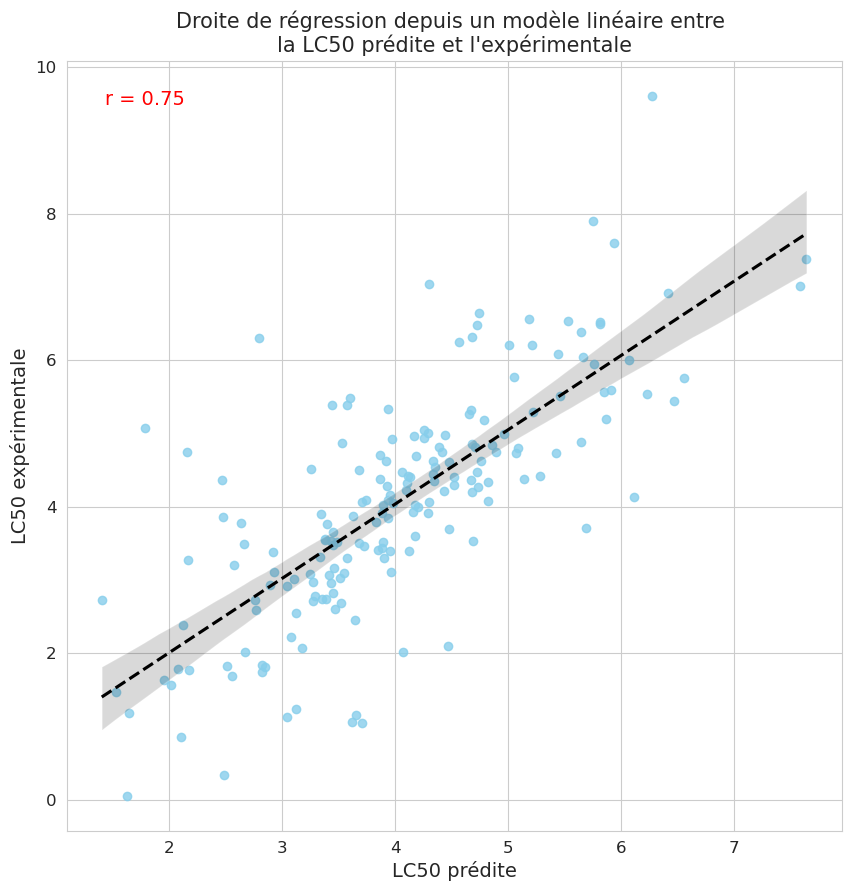

In [10]:
corr_coef, _ = pearsonr(df_LC50_test, predicted_LC50_test)
qu.scatter_QSAR(x_data = predicted_LC50_test, y_data = df_LC50_test,
                corr_coef=corr_coef)

- Résultat AD strict

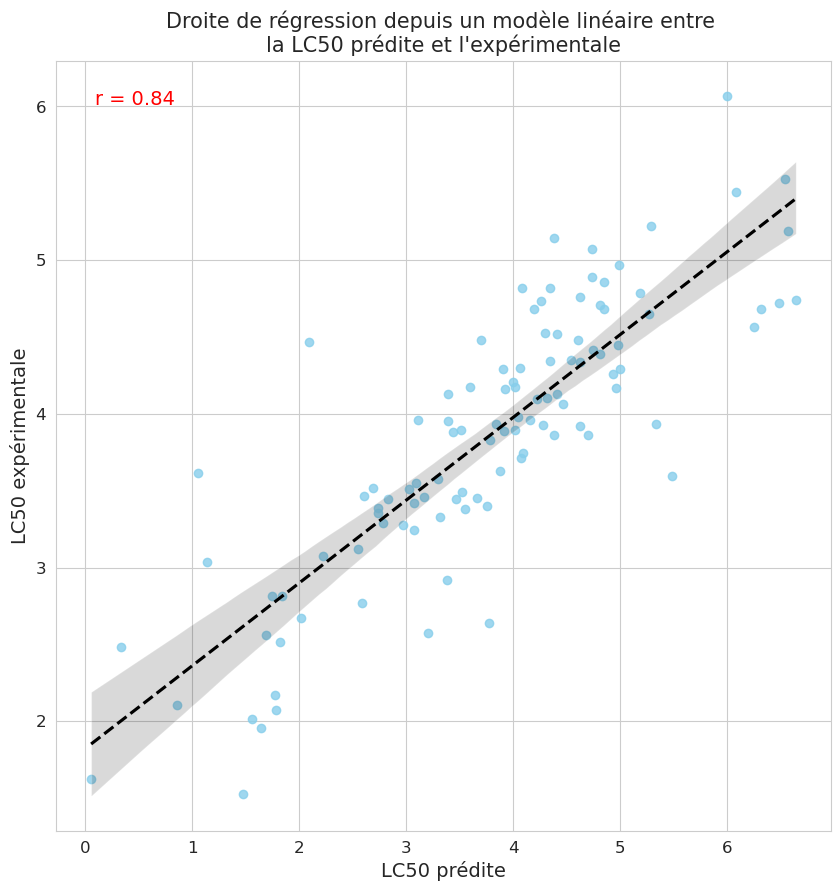

In [11]:
corr_coeff_strict, _ = pearsonr(y_test_strict, y_pred_strict)
qu.scatter_QSAR(x_data = y_pred_strict, y_data = y_test_strict,
                corr_coef=corr_coeff_strict)

- Résultat avec AD souple

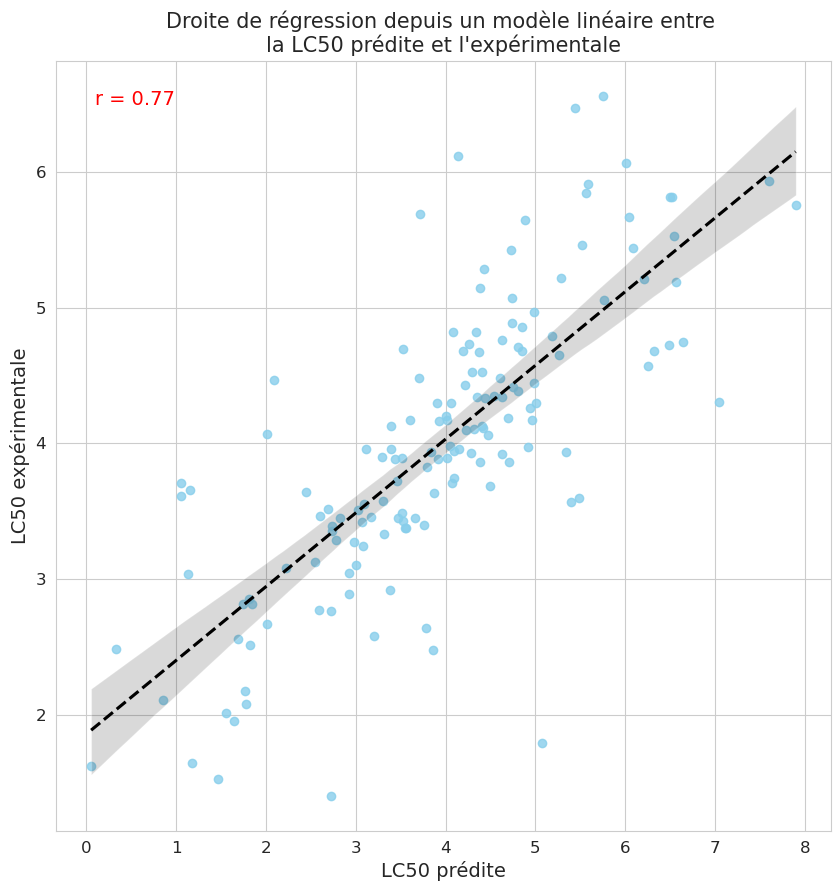

In [12]:
corr_coeff_soft, _ = pearsonr(y_test_soft, y_pred_soft)
qu.scatter_QSAR(x_data = y_pred_soft, y_data = y_test_soft,
                corr_coef=corr_coeff_soft)